In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#for test
chrom_region='chrX'
end_region=7595245
start_region=7573644

In [2]:
df = pd.read_csv('test_methylation.mr', header=None, sep='\t')
df.head()

,0,1,2,3,4,5,6,7,8
0,chrX,7265601,7267600,90,0,0.989130,0.967616,0.992412,0.999436
1,chrX,7266001,7268000,82,0,0.988095,0.964550,0.991684,0.999382
2,chrX,7266401,7268400,82,0,0.988095,0.964550,0.991684,0.999382
3,chrX,7266801,7268800,97,0,0.989899,0.969894,0.992952,0.999477
4,chrX,7267201,7269200,25,0,0.962963,0.891170,0.973693,0.998029


In [3]:
df.columns =  ["chr", "start", "end","methyl_sum","de_methyl_sum","per_methyl","low","ratio","high"]

In [5]:
df["center"] = df.apply(lambda x: int((x['start']+x['end'])/2), axis=1)

In [6]:
df.head()

,chr,start,end,methyl_sum,de_methyl_sum,per_methyl,low,ratio,high,center
0,chrX,7265601,7267600,90,0,0.989130,0.967616,0.992412,0.999436,7266600
1,chrX,7266001,7268000,82,0,0.988095,0.964550,0.991684,0.999382,7267000
2,chrX,7266401,7268400,82,0,0.988095,0.964550,0.991684,0.999382,7267400
3,chrX,7266801,7268800,97,0,0.989899,0.969894,0.992952,0.999477,7267800
4,chrX,7267201,7269200,25,0,0.962963,0.891170,0.973693,0.998029,7268200


In [7]:
df_q = df[df['chr'] == str(chrom_region)]
df_q.head()

,chr,start,end,methyl_sum,de_methyl_sum,per_methyl,low,ratio,high,center
0,chrX,7265601,7267600,90,0,0.989130,0.967616,0.992412,0.999436,7266600
1,chrX,7266001,7268000,82,0,0.988095,0.964550,0.991684,0.999382,7267000
2,chrX,7266401,7268400,82,0,0.988095,0.964550,0.991684,0.999382,7267400
3,chrX,7266801,7268800,97,0,0.989899,0.969894,0.992952,0.999477,7267800
4,chrX,7267201,7269200,25,0,0.962963,0.891170,0.973693,0.998029,7268200


In [8]:
df_s= df_q.query('@start_region <= center <= @end_region')
df_s.head()

,chr,start,end,methyl_sum,de_methyl_sum,per_methyl,low,ratio,high,center
768,chrX,7572801,7574800,2734,20984,0.115304,0.111911,0.115293,0.118733,7573800
769,chrX,7573201,7575200,2682,20728,0.114599,0.111194,0.114588,0.118042,7574200
770,chrX,7573601,7575600,500,19359,0.025225,0.023423,0.025209,0.027082,7574600
771,chrX,7574001,7576000,328,14009,0.022944,0.020926,0.022922,0.025038,7575000
772,chrX,7574401,7576400,304,6378,0.045631,0.041512,0.045586,0.049906,7575400


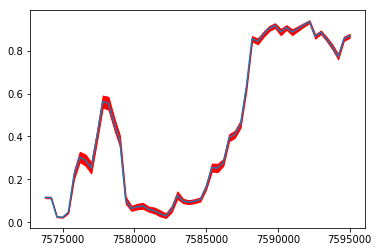

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(df_s['center'], df_s['ratio'])
ax.fill_between(df_s['center'],df_s["low"],df_s["high"],color='red')